### **Import libraries** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Load dataset**

In [ ]:
data = pd.read_csv("/content/diabetes.csv")

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Chcecking the relation of features with target variable**

<Figure size 576x432 with 0 Axes>

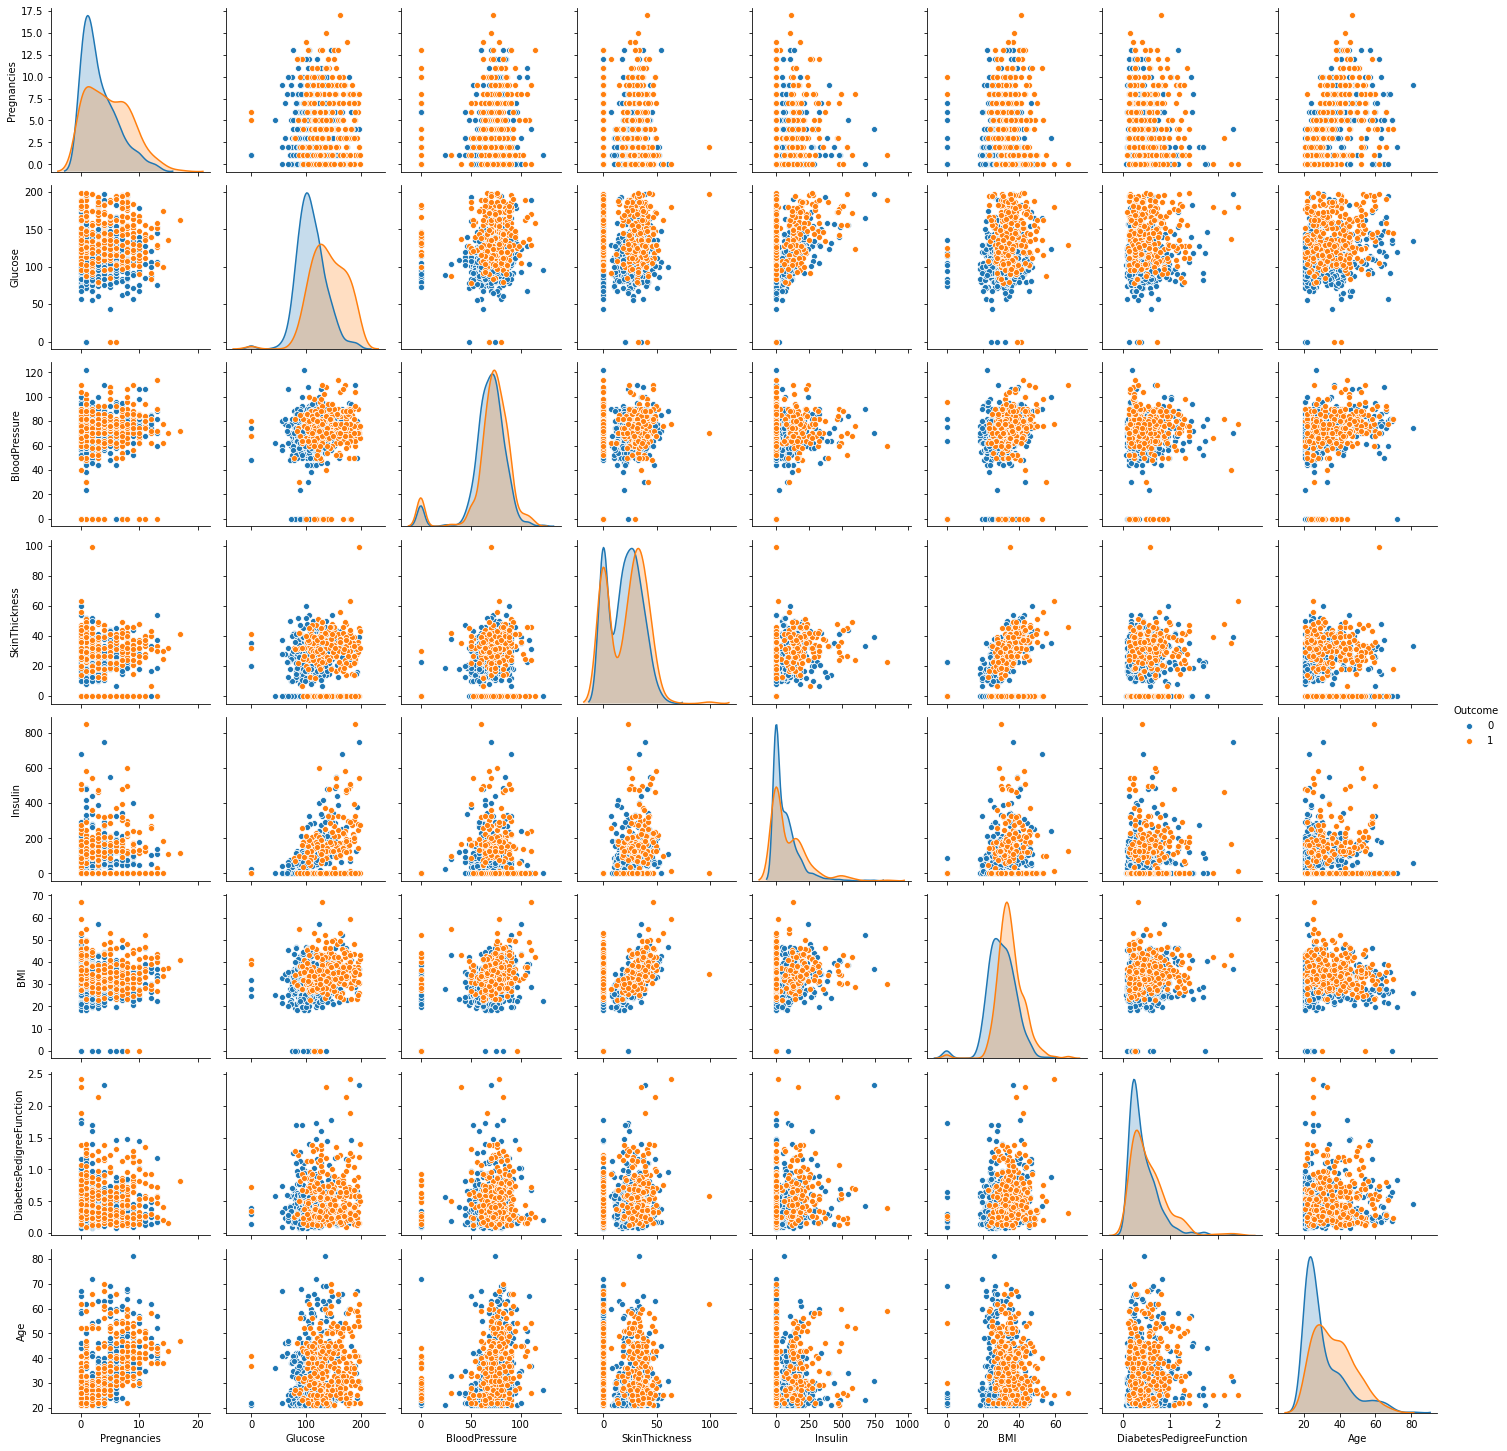

In [ ]:
plt.figure(figsize = (8,6))
sns.pairplot(data = data[:-1], hue = 'Outcome')

The features are not linear with the target variable.

### **Class balance**

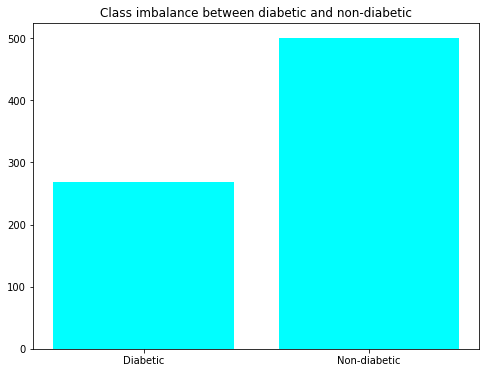

In [ ]:
diabetic = len(data[data['Outcome'] == 1])
non_diabetic = len(data[data['Outcome'] != 1])

plt.figure(figsize= (8,6))
plt.bar(x = ['Diabetic', 'Non-diabetic'], height=[diabetic, non_diabetic], color = 'cyan')
plt.title("Class imbalance between diabetic and non-diabetic")
plt.show()

The dataset is highly imbalance, so we should shuffle the data before using it  for any classification model.

### **Missing values**

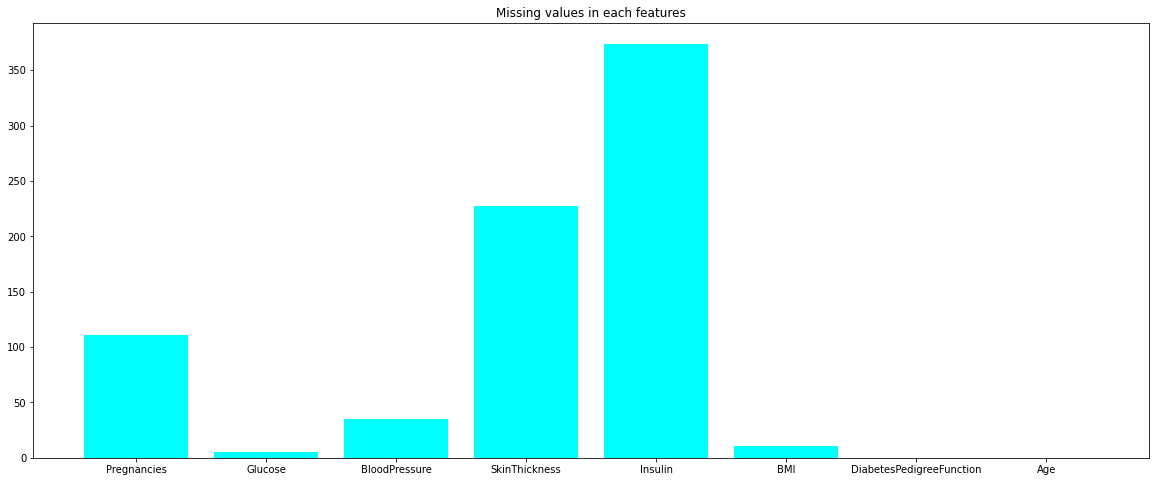

In [ ]:
def miss_val(data):
  cols = list(data.columns)
  missings = []
  for i in (cols[:-1]):
    count = len(data[data[i]== 0])
    missings.append(count)
  return (cols[:-1], missings)

labels, counts = miss_val(data)
plt.figure(figsize= (20,8))
plt.bar(x = labels, height= counts, color = 'cyan')
plt.title("Missing values in each features")
plt.show()


Instead of doing reduction technique we can remove the missing value because the dataset is small and removing too much data results in loosing the underlying information